In [1]:
from IPython.display import display, HTML, clear_output

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 90%; }
    div#maintoolbar-container { width: 90%; }
</style>
"""))

import pandas as pd
import numpy as np
import os
import glob
import sys
import datetime
import json
from pandas.io.json import json_normalize

from datetime import timedelta
from pathlib import Path
import time
import seaborn as sns
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyreadstat

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings. filterwarnings('ignore')

pd.options.display.html.table_schema = True
pd.set_option('display.max_columns', 500)

#alt.renderers.enable('notebook')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

In [4]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt

In [6]:
TARGET_CRIME = "crime_category_encoded"

In [7]:
# 'unnamed: 0', 
# 'id',
# 'block', 
# 'case_number', 
# 'name', 
# 'location.human_address'
# 'location.latitude',
# 'location.longitude',
# 'month_num',

# over predictive
# 'primary_type', 
# 'fbi_code', 
# 'iucr', 
# 'description'

In [8]:
# Load data
df = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\Exploratory Data Analysis\input\Dataframes Modified\df_2023_environmental_complaint.csv')

df.columns = df.columns.str.lower()

#df['date'] = pd.to_datetime(df['date'])

# Most predictive variables: primary_type, fbi_code, iucr, description

df = df.drop(['unnamed: 0', 'id', 'block', 'case_number', 'name', 'location.human_address', 'location.latitude', 'location.longitude', 'month', 'primary_type', 'fbi_code', 'iucr', 'description', 'arrest', 'domestic', 'updated_on', 'population', 'area(sq mi.)', 'community_name', 'tot_num_environ_complaints'], axis=1)

df

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month_num,regional_community,crime_category,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,Sunday,Weekend,1,Far Southeast Side,violent_crime,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,Sunday,Weekend,1,Southwest Side,violent_crime,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,Sunday,Weekend,1,Far Southeast Side,violent_crime,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,Sunday,Weekend,1,Far North Side,property_crime,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,Sunday,Weekend,1,West Side,violent_crime,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259298,2023-12-31,APARTMENT,214,2,3.0,38.0,2023,41.821173,-87.615042,11.0,92.0,1.1,0.0,37.94,32.00,34.34,3510 S Michigan Ave,0.580390,Sunday,Weekend,12,South Side,violent_crime,14131.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
259299,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.879292,-87.741397,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,0.952029,Sunday,Weekend,12,West Side,violent_crime,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259300,2023-12-31,RESIDENCE - PORCH / HALLWAY,1812,18,43.0,7.0,2023,41.920916,-87.642431,5.0,567.0,1.1,0.0,37.94,32.00,34.34,1160 N Larrabee St,0.081456,Sunday,Weekend,12,North Side,property_crime,22307.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
259301,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.885373,-87.744018,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,1.125653,Sunday,Weekend,12,West Side,property_crime,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

In [10]:
# Categorized Crimes: 0 = Nonviolent Crimes; 1 = Violent Crimes; 2 = Property Crimes
df['crime_category_encoded'] = df['crime_category'].apply(lambda x: 0 if x in ['nonviolent_crime'] else (1 if x in ['violent_crime'] else 2))

df = df.drop(['crime_category'], axis=1)

df

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month_num,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,Sunday,Weekend,1,Far Southeast Side,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,Sunday,Weekend,1,Southwest Side,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,Sunday,Weekend,1,Far Southeast Side,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,Sunday,Weekend,1,Far North Side,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,Sunday,Weekend,1,West Side,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259298,2023-12-31,APARTMENT,214,2,3.0,38.0,2023,41.821173,-87.615042,11.0,92.0,1.1,0.0,37.94,32.00,34.34,3510 S Michigan Ave,0.580390,Sunday,Weekend,12,South Side,14131.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
259299,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.879292,-87.741397,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,0.952029,Sunday,Weekend,12,West Side,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
259300,2023-12-31,RESIDENCE - PORCH / HALLWAY,1812,18,43.0,7.0,2023,41.920916,-87.642431,5.0,567.0,1.1,0.0,37.94,32.00,34.34,1160 N Larrabee St,0.081456,Sunday,Weekend,12,North Side,22307.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2
259301,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.885373,-87.744018,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,1.125653,Sunday,Weekend,12,West Side,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [11]:
# Numerical categories for DOW
df[['dow']] = df[['dow']].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0,1,2,3,4,5,6])

# Numerical categories for Day Type
df[['daytype']] = df[['daytype']].replace(['Weekday', 'Weekend'], [0,1])

# Numerical categories for Regional Community
df[['regional_community']] = df[['regional_community']].replace(['South Side', 'Far Southeast Side', 'Far North Side', 'Northwest Side', 'West Side', 'Far Southwest Side', 'Central', 'Southwest Side', 'North Side', -99], [0,1,2,3,4,5,6,7,8,9])

df

,date,location_description,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station,closest_station_distance,dow,daytype,month_num,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded
0,2023-01-01,APARTMENT,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,2255 E 103rd St,0.534530,6,1,1,1,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2023-01-01,RESIDENCE,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,3120 S Halsted St,0.419931,6,1,1,7,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2023-01-01,RESIDENCE,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,5101 S Wentworth Ave,0.408652,6,1,1,1,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2023-01-01,APARTMENT,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,850 W Addison St,0.256114,6,1,1,2,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2023-01-01,APARTMENT,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,1412 S Blue Island Ave\n,0.112622,6,1,1,4,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259298,2023-12-31,APARTMENT,214,2,3.0,38.0,2023,41.821173,-87.615042,11.0,92.0,1.1,0.0,37.94,32.00,34.34,3510 S Michigan Ave,0.580390,6,1,12,0,14131.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
259299,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.879292,-87.741397,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,0.952029,6,1,12,4,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
259300,2023-12-31,RESIDENCE - PORCH / HALLWAY,1812,18,43.0,7.0,2023,41.920916,-87.642431,5.0,567.0,1.1,0.0,37.94,32.00,34.34,1160 N Larrabee St,0.081456,6,1,12,8,22307.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2
259301,2023-12-31,RESIDENCE,1113,11,28.0,25.0,2023,41.885373,-87.744018,69.0,156.0,1.1,0.0,37.94,32.00,34.34,4650 N Pulaski Rd,1.125653,6,1,12,4,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [12]:
# Load data for labeling police station
df_station_labels = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\Exploratory Data Analysis\input\Dataframes Modified\df_station_labels.csv')

df_station_labels.columns = df_station_labels.columns.str.lower()

df_station_labels

,closest_station,closest_station_num
0,2255 E 103rd St,0
1,3120 S Halsted St,1
2,5101 S Wentworth Ave,2
3,850 W Addison St,3
4,1412 S Blue Island Ave\n,4
5,7040 S Cottage Grove Ave,5
6,4650 N Pulaski Rd,6
7,6464 N Clark St,7
8,3420 W 63rd St,8
9,7808 S Halsted St,9


In [13]:
# Load data for labeling location description
df_loc_description_labels = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\Exploratory Data Analysis\input\Dataframes Modified\df_loc_description_labels.csv')

df_loc_description_labels.columns = df_loc_description_labels.columns.str.lower()

df_loc_description_labels

,location_description,location_description_num
0,APARTMENT,0
1,RESIDENCE,1
2,OTHER (SPECIFY),2
3,SMALL RETAIL STORE,3
4,ALLEY,4
...,...,...
128,STAIRWELL,128
129,CHA GROUNDS,129
130,HOSPITAL,130
131,HOTEL,131


In [14]:
df = pd.merge(df, df_station_labels, on='closest_station', how='left')
df = pd.merge(df, df_loc_description_labels, on='location_description', how='left')

df = df.drop(['closest_station', 'location_description'], axis=1)

df

,date,beat,district,ward,community_area,year,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station_distance,dow,daytype,month_num,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,extreme weather notification,ice and snow removal request,low water pressure complaint,crime_category_encoded,closest_station_num,location_description_num
0,2023-01-01,414,4,8.0,46.0,2023,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,0.534530,6,1,1,1,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2023-01-01,733,7,17.0,68.0,2023,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,0.419931,6,1,1,7,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
2,2023-01-01,2233,22,21.0,49.0,2023,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,0.408652,6,1,1,1,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,1
3,2023-01-01,2023,20,48.0,77.0,2023,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,0.256114,6,1,1,2,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0
4,2023-01-01,1214,12,27.0,28.0,2023,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,0.112622,6,1,1,4,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259298,2023-12-31,214,2,3.0,38.0,2023,41.821173,-87.615042,11.0,92.0,1.1,0.0,37.94,32.00,34.34,0.580390,6,1,12,0,14131.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,10,0
259299,2023-12-31,1113,11,28.0,25.0,2023,41.879292,-87.741397,69.0,156.0,1.1,0.0,37.94,32.00,34.34,0.952029,6,1,12,4,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,1
259300,2023-12-31,1812,18,43.0,7.0,2023,41.920916,-87.642431,5.0,567.0,1.1,0.0,37.94,32.00,34.34,0.081456,6,1,12,8,22307.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2,18,27
259301,2023-12-31,1113,11,28.0,25.0,2023,41.885373,-87.744018,69.0,156.0,1.1,0.0,37.94,32.00,34.34,1.125653,6,1,12,4,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6,1


In [15]:
df['date'] = df['date'].astype(str)

df['day'] = df.date.str[8:10].astype("int64")

df = df.drop(['date', 'extreme weather notification', 'year'], axis=1)
#df = df.drop(['date', 'extreme weather notification'], axis=1)

df

,beat,district,ward,community_area,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station_distance,dow,daytype,month_num,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,ice and snow removal request,low water pressure complaint,crime_category_encoded,closest_station_num,location_description_num,day
0,414,4,8.0,46.0,41.745739,-87.575883,68.0,62.0,3.8,0.0,44.96,37.04,41.72,0.534530,6,1,1,1,8173.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,733,7,17.0,68.0,41.760645,-87.651575,99.0,87.0,3.8,0.0,44.96,37.04,41.72,0.419931,6,1,1,7,7937.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
2,2233,22,21.0,49.0,41.693364,-87.634381,106.0,84.0,3.8,0.0,44.96,37.04,41.72,0.408652,6,1,1,1,8053.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,1,1
3,2023,20,48.0,77.0,41.976852,-87.655000,24.0,183.0,3.8,0.0,44.96,37.04,41.72,0.256114,6,1,1,2,32354.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0,1
4,1214,12,27.0,28.0,41.887136,-87.655685,12.0,328.0,3.8,0.0,44.96,37.04,41.72,0.112622,6,1,1,4,11929.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259298,214,2,3.0,38.0,41.821173,-87.615042,11.0,92.0,1.1,0.0,37.94,32.00,34.34,0.580390,6,1,12,0,14131.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,10,0,31
259299,1113,11,28.0,25.0,41.879292,-87.741397,69.0,156.0,1.1,0.0,37.94,32.00,34.34,0.952029,6,1,12,4,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,1,31
259300,1812,18,43.0,7.0,41.920916,-87.642431,5.0,567.0,1.1,0.0,37.94,32.00,34.34,0.081456,6,1,12,8,22307.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2,18,27,31
259301,1113,11,28.0,25.0,41.885373,-87.744018,69.0,156.0,1.1,0.0,37.94,32.00,34.34,1.125653,6,1,12,4,13504.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6,1,31


In [16]:
df.dtypes

OverflowError: Maximum recursion level reached

beat                                                       int64
district                                                   int64
ward                                                     float64
community_area                                           float64
latitude                                                 float64
longitude                                                float64
total_offenders_in_ca                                    float64
total_complaints_in_ca                                   float64
prcp                                                     float64
snow                                                     float64
tempmax_f                                                float64
tempmin_f                                                float64
tempavg_f                                                float64
closest_station_distance                                 float64
dow                                                        int64
daytype                  

In [17]:
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

In [19]:
corr_matrix = df.corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues

array([4.03360459e+00, 3.84215885e+00, 2.95212830e+00, 2.32497825e+00,
       1.64405997e+00, 5.86929689e-02, 1.86047482e-02, 1.78570890e-04,
       7.86505269e-05, 3.03299870e-03, 2.03784769e-01, 2.70706576e-01,
       1.37475798e+00, 3.62885012e-01, 4.12761304e-01, 5.18914827e-01,
       1.23401625e+00, 1.21476219e+00, 5.75753506e-01, 5.98407956e-01,
       6.48833237e-01, 1.14188708e+00, 7.06440156e-01, 7.77043198e-01,
       7.93018561e-01, 8.33588566e-01, 1.05226674e+00, 1.03949943e+00,
       8.61171391e-01, 1.00911364e+00, 1.00150263e+00, 9.84954832e-01,
       9.07693034e-01, 9.71201620e-01, 9.61608514e-01, 9.18128215e-01,
       9.22897911e-01, 9.35192183e-01, 9.42230443e-01, 9.47460337e-01])

In [20]:
corr_matrix

,beat,district,ward,community_area,latitude,longitude,total_offenders_in_ca,total_complaints_in_ca,prcp,snow,tempmax_f,tempmin_f,tempavg_f,closest_station_distance,dow,daytype,month_num,regional_community,density (/sq mi.),clean and green program request,lead inspection request,sewer cave-in inspection request,sewer cleaning inspection request,snow - object/dibs removal request,snow removal - protected bike lane or bridge sidewalk,snow – uncleared sidewalk complaint,tree debris clean-up request,tree emergency,tree planting request,tree removal request,tree trim request (no longer being accepted),water lead test kit request,water lead test visit request,water quality concern,ice and snow removal request,low water pressure complaint,crime_category_encoded,closest_station_num,location_description_num,day
beat,1.000000,0.999819,0.667371,-0.484329,0.022023,-0.141862,-0.190607,0.248065,0.001824,-0.003442,-0.001847,-0.000812,-0.001594,-0.001321,0.008835,0.006144,0.008935,0.263691,0.415778,0.008408,-0.007861,0.082554,0.067195,0.028597,0.008003,0.051155,0.025485,0.060781,0.000137,0.123606,0.083126,0.143500,0.008880,0.007973,0.015830,0.080681,0.023001,0.138958,0.024485,-0.003319
district,0.999819,1.000000,0.668185,-0.484600,0.022096,-0.142147,-0.190936,0.246884,0.001818,-0.003455,-0.001833,-0.000801,-0.001578,-0.001359,0.008748,0.006030,0.008953,0.263309,0.415561,0.008309,-0.007906,0.082451,0.067129,0.028421,0.007995,0.051116,0.025525,0.060892,0.000264,0.123694,0.083177,0.143622,0.008799,0.007916,0.015796,0.080676,0.023051,0.139723,0.024371,-0.003330
ward,0.667371,0.668185,1.000000,-0.544262,0.025218,-0.125528,-0.270555,0.277964,0.003058,-0.000072,-0.001402,-0.000576,-0.001030,-0.001769,0.005334,0.002798,0.003313,0.251089,0.433766,0.001354,-0.018826,0.064588,0.021214,0.010609,0.006285,0.048799,-0.038242,0.020152,0.002192,0.058876,0.065492,0.117135,-0.008100,0.006285,0.009029,0.041199,0.028019,0.171881,0.073769,-0.005640
community_area,-0.484329,-0.484600,-0.544262,1.000000,-0.026442,0.055036,0.412993,-0.453267,0.000791,0.008316,-0.006443,-0.008150,-0.007440,0.001961,-0.011366,-0.011035,-0.014382,-0.046084,-0.575592,-0.000532,0.016026,-0.066238,-0.029273,0.005153,-0.022354,-0.060035,0.086439,-0.003691,0.010179,-0.007747,-0.081869,-0.123407,0.032798,-0.016436,-0.012852,-0.023806,-0.049834,-0.102716,-0.038403,0.006418
latitude,0.022023,0.022096,0.025218,-0.026442,1.000000,0.959748,-0.010845,0.012212,0.000111,0.002238,0.011788,0.009179,0.010578,-0.999482,0.001644,0.000909,-0.017018,0.006280,0.021694,0.002126,0.000484,0.003801,0.000505,-0.000249,0.001227,0.003160,-0.000077,0.002816,-0.000009,0.006110,0.002499,0.009283,-0.001498,-0.001554,0.002160,0.003324,0.001373,-0.023491,0.000971,-0.008108
longitude,-0.141862,-0.142147,-0.125528,0.055036,0.959748,1.000000,0.018025,0.016089,-0.000827,0.003108,0.012144,0.009711,0.011116,-0.964729,0.001324,0.001463,-0.018089,-0.089267,0.014143,-0.001107,0.002222,-0.017542,-0.019195,-0.020412,0.000863,-0.000143,-0.003816,-0.007691,-0.010823,-0.026233,-0.013057,-0.016389,-0.005358,-0.001233,-0.003789,-0.031420,0.011311,-0.130538,-0.016278,-0.005876
total_offenders_in_ca,-0.190607,-0.190936,-0.270555,0.412993,-0.010845,0.018025,1.000000,-0.291803,0.000652,0.001495,-0.009146,-0.010133,-0.010273,-0.002823,-0.009090,-0.005134,-0.014492,-0.124349,-0.345988,0.038427,0.052943,0.022509,0.106731,0.051251,-0.016915,-0.032910,0.261745,0.113300,0.045434,0.144897,-0.026982,0.010160,0.078109,0.018984,0.015586,0.102793,-0.092238,-0.141080,-0.091237,0.001540
total_complaints_in_ca,0.248065,0.246884,0.277964,-0.453267,0.012212,0.016089,-0.291803,1.000000,-0.001107,-0.002867,0.008185,0.009592,0.009361,0.000473,0.017978,0.016920,0.011764,0.458430,0.564998,0.013886,-0.007399,0.085572,0.020190,-0.009182,0.038586,0.064167,-0.075295,0.008874,-0.019800,0.033256,0.164264,0.149920,-0.009621,0.025082,0.021807,0.004212,0.085914,0.093189,0.074138,-0.003160
prcp,0.001824,0.001818,0.003058,0.000791,0.000111,-0.000827,0.000652,-0.001107,1.00

In [21]:
np.sum(eigenvalues > 1)

13

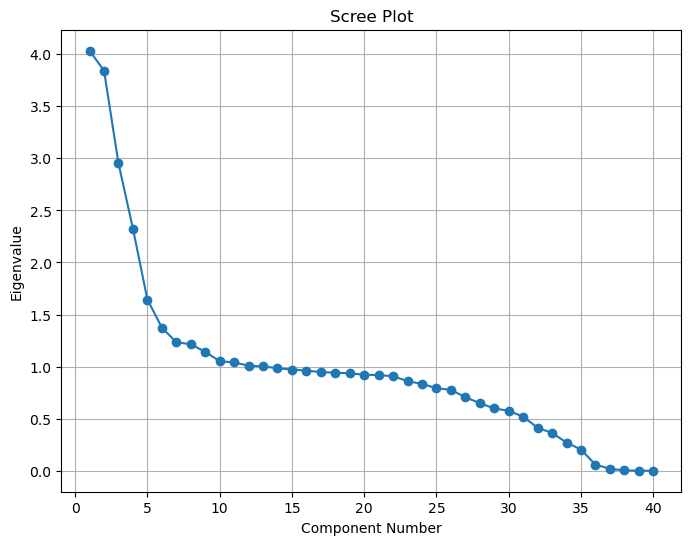

In [22]:
# create a Scree Plot for the Eigenvalues for df6 (religious vs non religious)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [23]:
# Scale the Data to account for the "9" Values in the Pew Responses
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

In [24]:
from sklearn.decomposition import PCA

# Create a PCA instance with 9 components based on the eigenvalue investigation and no rotation
pca = PCA(n_components=7, random_state = 42)

# Fit the PCA model to your dataframe and transform the data to the principal components
pc1 = pca.fit_transform(X_scaled)

In [25]:
print(pc1.shape)

(259303, 7)


Text(0, 0.5, 'Principal components')

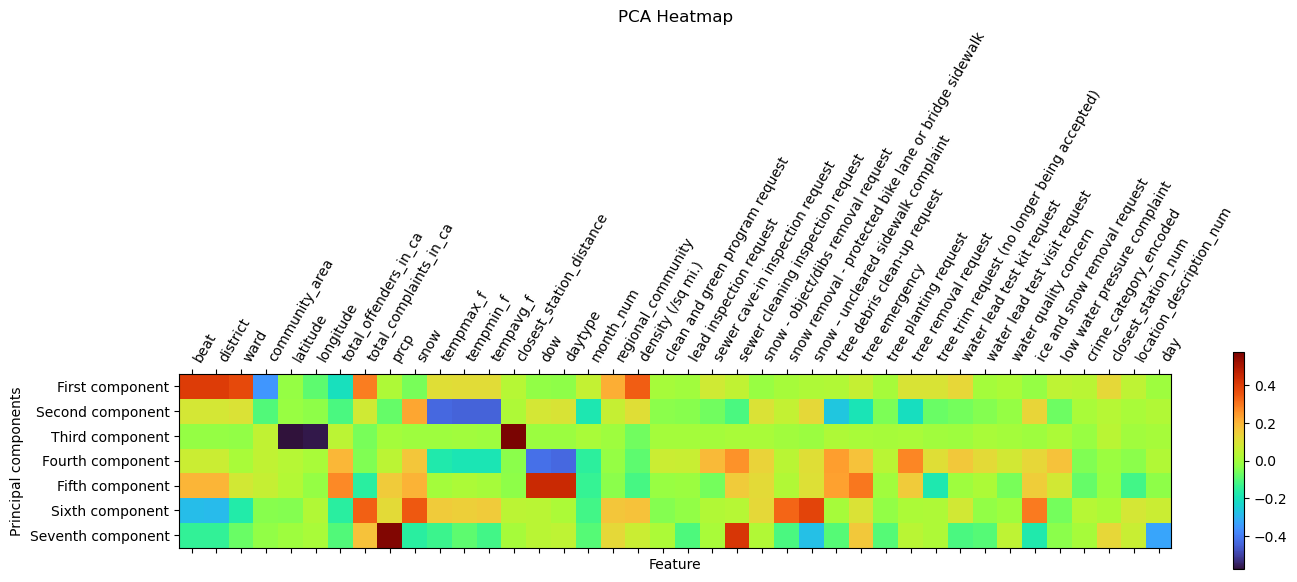

In [26]:
plt.matshow(pca.components_, cmap='turbo')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ["First component", "Second component", "Third component", "Fourth component",
                               "Fifth component", "Sixth component", "Seventh component"])
plt.colorbar()
plt.title("PCA Heatmap")
plt.xticks(range(len(df.columns)),
           df, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [27]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

cumulative_variance_ratio

array([0.10083954, 0.19689336, 0.27069093, 0.3287973 , 0.36984932,
       0.40386322, 0.43381416])

In [28]:
pc1_scores = pca.components_
# Define the threshold value
threshold = 0.3

# Iterate through each principal component
for component_num, component_scores in enumerate(pc1_scores):
    # Find the columns with PCA scores greater than the threshold
    relevant_columns = [column for column, score in zip(df.columns, component_scores) if abs(score) > threshold]
    
    # Print or use the relevant columns for each component
    print(f"Columns with PCA score > {threshold} for Component {component_num + 1}:")
    print(relevant_columns)
    
    # Print the scores of the relevant columns
    for column in relevant_columns:
        print(f"Scores for '{column}': {component_scores[df.columns.get_loc(column)]}")
    print()

Columns with PCA score > 0.3 for Component 1:
['beat', 'district', 'ward', 'community_area', 'density (/sq mi.)']
Scores for 'beat': 0.4015999664152198
Scores for 'district': 0.4016315181364101
Scores for 'ward': 0.37481991775525
Scores for 'community_area': -0.3525244011652868
Scores for 'density (/sq mi.)': 0.3376567087115455

Columns with PCA score > 0.3 for Component 2:
['tempmax_f', 'tempmin_f', 'tempavg_f']
Scores for 'tempmax_f': -0.4362292339869918
Scores for 'tempmin_f': -0.4418146387019268
Scores for 'tempavg_f': -0.4447414145007363

Columns with PCA score > 0.3 for Component 3:
['latitude', 'longitude', 'closest_station_distance']
Scores for 'latitude': -0.5761312225398324
Scores for 'longitude': -0.5657431334988527
Scores for 'closest_station_distance': 0.5753724576362627

Columns with PCA score > 0.3 for Component 4:
['dow', 'daytype']
Scores for 'dow': -0.42198577279611615
Scores for 'daytype': -0.4351255129226893

Columns with PCA score > 0.3 for Component 5:
['dow', 'da